<h2><center><font color=#D40004><u> Unsupervised Clustering and Visualization of Scientific Papers Based on Abstracts </u></font></center></h2>
<h3><center> MOUHAJIR Mohamed</center></h3>
<center> 2st year Artificial Intelligence Engineering student at ENSIAS Rabat (Morocco) </center>
<br> 


# Goal of this Project
The primary objective of this project is to apply unsupervised machine learning techniques to cluster scientific papers based on their abstracts.

By leveraging clustering algorithms for labeling and employing dimensionality reduction methods for visual representation, we aim to create a scatter plot that captures the relationships between papers with similar topics. Papers sharing common themes will be grouped together and plotted in close proximity. Additionally, if the clustering process yields satisfactory results, we will explore the clusters further using topic modeling to extract the most relevant keywords associated with each cluster. This analysis will help identify publications with similar research backgrounds and facilitate comparisons between similar studies and articles.

To ensure the data is suitable for clustering, we will preprocess it using Natural Language Processing (NLP) techniques. Throughout the project, we will also investigate the impact of various preprocessing steps on cluster quality. This includes exploring approaches such as stop word removal, handling multilingual data, and employing diverse vectorization strategies to optimize the clustering results.

# <font color='green'><u> Table of Contents:</u></font> <br>

<font color = 'blue'>
    
1. [Introduction.](#1)

1. [Importing/Loading & checking the data.](#2)

1. [ Data Cleaning.](#3)

1. [NLP data preprocessing.](#4)
 
1. [Model Training: BERTopic.](#5)

    1. [Topic Representation.](#6)

    1. [Topic Relationships.](#7)
    
    1. [Topics over Time.](#8)
    
1. [Clustering using scikit-learn: Uncovering Patterns in Data.](#9)
    
    1. [Vectorization of the abstracts and dimensionality reduction with PCA.](#10)
    
    1. [Hierarchical clustering.](#11)
    
    1. [Spectral clustering.](#12)
    
    1. [Self-organizing maps (SOM).](#13)

<a id = "1"></a><br>
# <font color="green"><u> I. Introduction:</u></font>

The vast amount of scientific literature available today presents both a challenge and an opportunity for researchers to extract meaningful insights from the wealth of information. Clustering and visualizing scientific papers based on their abstracts has emerged as a valuable technique to uncover hidden patterns, identify research trends, and facilitate literature exploration. This project aims to leverage unsupervised machine learning methods to cluster scientific papers and provide visual representations that aid in understanding and navigating the research landscape.

The objective of this project is to apply clustering algorithms to group scientific papers with similar topics together. By analyzing the abstracts, which serve as concise summaries of the papers' contents, we can uncover underlying thematic relationships and identify clusters of papers that share common research themes or domains. Additionally, we aim to employ dimensionality reduction techniques to visualize the clustered papers in a scatter plot, enabling researchers to gain insights at a glance and identify clusters of interest.

Moreover, this project extends beyond clustering and visualization. We seek to explore the interpretability of the clusters by using topic modeling techniques to extract keywords and themes associated with each cluster. This additional layer of analysis provides further context and understanding of the research areas represented by the clusters. It enables researchers to discover publications with similar research backgrounds, compare findings, and gain valuable insights into the broader research landscape.

To ensure optimal clustering results, various preprocessing steps will be applied to the data. Natural Language Processing (NLP) techniques will be employed to clean and prepare the abstracts for analysis. This includes tasks such as stop word removal, handling different languages, and employing different vectorization strategies to represent the text data accurately.

By conducting this project, we aim to contribute to the field of scientific literature analysis by providing a valuable tool for researchers to explore and navigate the vast amount of available knowledge. The clustering and visualization techniques, coupled with topic modeling, will enable researchers to gain a comprehensive understanding of research trends, discover related publications, and make informed decisions about areas of study and collaboration.

<a id = "2"></a><br>
# <font color="green"><u> II. Importing/Loading & checking the data:</u></font>

In [1]:
%%capture
!pip install bertopic
!pip install minisom

In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 

In [3]:
import pandas as pd                                        #Data processing, CSV files I/O (e.g. pd.read_csv)
import numpy as np                                         #Linear Algebra: Matrices ...
import matplotlib.pyplot as plt                            #Data Visualisation
import seaborn as sns    
from bertopic import BERTopic

from tqdm import tqdm
# I discoverd that it's possible to download models for the specific purpose to preprocess scientific texts
# In the spacy docs I found a specific model for this : https://spacy.io/universe/project/scispacy
#Downloading en_core_sci_lg model to preprocess abstracts
from IPython.utils import io
with io.capture_output() as captured:
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



In [4]:
#Import NLP librarys and the spacy package to preprocess the abstract text
import spacy
from spacy.lang.en.stop_words import STOP_WORDS #import commen list of stopword
import en_core_sci_lg  # import downlaoded model
import string
from minisom import MiniSom  
from sklearn.cluster import SpectralClustering 
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [5]:
df =  pd.read_csv("/kaggle/input/research-papers-dataset/dblp-v10.csv")
df.head(5)

,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   abstract    827533 non-null   object
 1   authors     999998 non-null   object
 2   n_citation  1000000 non-null  int64 
 3   references  875583 non-null   object
 4   title       1000000 non-null  object
 5   venue       822245 non-null   object
 6   year        1000000 non-null  int64 
 7   id          1000000 non-null  object
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
df.isna().sum()

abstract      172467
authors            2
n_citation         0
references    124417
title              0
venue         177755
year               0
id                 0
dtype: int64

<a id = "3"></a><br>
# <font color="green"><u> III. Data Cleaning:</u></font>

In [8]:
df.dropna(subset='abstract',inplace=True)

In [9]:
df.isna().sum()

abstract           0
authors            1
n_citation         0
references     40309
title              0
venue         103765
year               0
id                 0
dtype: int64

<a id = "4"></a><br>
 # <font color="green"><u> IV. NLP data preprocessing:</u></font>

In [10]:
# Parser
parser = en_core_sci_lg.load()
parser.max_length = 7000000 #Limit the size of the parser

def spacy_tokenizer(sentence):
    ''' Function to preprocess text of scientific papers 
        (e.g Removing Stopword and puntuations)'''
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ] # transform to lowercase and then split the scentence
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ] #remove stopsword an punctuation
    mytokens = " ".join([i for i in mytokens]) 
    return mytokens

In [11]:
punctuations = string.punctuation #list of punctuation to remove from text
stopwords = list(STOP_WORDS)
stopwords[:10]

['between',
 'sometimes',
 'enough',
 'elsewhere',
 'bottom',
 'fifty',
 'twelve',
 'side',
 'onto',
 'him']

In [12]:
# the dataframe contains still hugh amount of data. The process the data faster I reduce the df to 10000 rows
# The scope of the notebook is not to analyze all data
df = df.sample(10000, random_state=42)

In [13]:
tqdm.pandas()
df["processed_text"] = df["abstract"].progress_apply(spacy_tokenizer)

100%|██████████| 10000/10000 [05:09<00:00, 32.32it/s]


In [14]:
df['abstract']

501413    We present the Cyclic Zipper Method, a procedu...
885972    gprMax is open source software that simulates ...
384206    It is relatively easy for Japanese students st...
679709    Tweets are short messages that do not exceed 1...
484968    In various literatures, it has been argued tha...
                                ...                        
491693    The authors present a method that combines reg...
973557    In Model-Driven Engineering system-level appro...
276337    Recently, Ye (2005) suggested yet another opti...
506200    An automatic algorithm of degraded color docum...
285547    This paper describes a robotic-head system as ...
Name: abstract, Length: 10000, dtype: object

<a id = "5"></a><br>
# <font color="green"><u> V. Model Training: BERTopic:</u></font>

To train our BERTopic model, we make a few adjustments to the default parameters while ensuring originality.

Firstly, we select the embedding model "paraphrase-MiniLM-L6-v2" as our preferred choice. This particular embedding model, which can be accessed from the provided link, strikes a balance between performance and speed, making it an excellent option for sentence transformation.

Furthermore, we set the minimum topic size to 50. This parameter determines the smallest allowable size for each topic. By imposing this restriction, we aim to limit the number of generated topics. For instance, if the minimum were set to 10, a significantly larger number of topics would be created, but they might be of lesser significance. In order to prioritize substantial topics, we opt for a minimum size of 10.

In [15]:
topic_model = BERTopic(verbose=True, embedding_model="paraphrase-MiniLM-L6-v2", min_topic_size=50)
topics, _ = topic_model.fit_transform(df["processed_text"].to_numpy()); len(topic_model.get_topic_info())

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2023-06-02 11:22:05,651 - BERTopic - Transformed documents to Embeddings
2023-06-02 11:22:44,503 - BERTopic - Reduced dimensionality
2023-06-02 11:22:45,281 - BERTopic - Clustered reduced embeddings


23

<a id = "6"></a><br>
> # <font color="green"><u> A. Topic Representation:</u></font>

In [16]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4402,-1_use_system_model_paper,"[use, system, model, paper, propose, result, d...",[communication link consider successful desire...
1,0,742,0_image_method_use_segmentation,"[image, method, use, segmentation, propose, ob...",[conventional object detection algorithm assoc...
2,1,591,1_problem_algorithm_graph_solution,"[problem, algorithm, graph, solution, function...",[study asymptotic behavior interior-point meth...
3,2,580,2_network_wireless_protocol_routing,"[network, wireless, protocol, routing, node, p...",[energy consumption utmost importance ad hoc w...
4,3,457,3_memory_performance_system_processor,"[memory, performance, system, processor, cache...",[paper present different acceleration concept ...
5,4,394,4_channel_code_mimo_performance,"[channel, code, mimo, performance, antenna, sc...",[letter address carrier frequency offset chann...
6,5,370,5_software_process_model_system,"[software, process, model, system, business, p...",[business process definition popular instrumen...
7,6,326,6_protein_gene_sequence_datum,"[protein, gene, sequence, datum, genome, dna, ...",[motivation paper present global test use anal...
8,7,323,7_robot_control_motion_robotic,"[robot, control, motion, robotic, human, syste...",[multi-robot path planning abstract problem co...
9,8,262,8_security_attack_privacy_key,"[security, attack, privacy, key, secure, proto...",[extensive use wireless technology security im...


In [17]:
topic_model.visualize_barchart(top_n_topics=9, height=700)

In [18]:
topic_model.visualize_term_rank()

<a id = "7"></a><br>
> # <font color="green"><u> B. Topic Relationships:</u></font>

In [19]:
topic_model.visualize_topics(top_n_topics=21)

In [20]:
topic_model.visualize_hierarchy(top_n_topics=21, width=800)

In [21]:
topic_model.visualize_heatmap(n_clusters=5, top_n_topics=21)

<a id = "8"></a><br>
> # <font color="green"><u> C. Topics over Time:</u></font>

In [22]:
# year = df.year.astype(np.int64).tolist()
# year = list(set(year))
# topics_over_time = topic_model.topics_over_time(df.abstract, topics,year )

In [23]:
# topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20, width=900, height=500)

<a id = "9"></a><br>
# <font color="green"><u> V. Clustering using scikit-learn: Uncovering Patterns in Data:</u></font>

<a id = "9"></a><br>
># <font color="green"><u> A. Vectorization of the abstracts and dimensionality reduction with PCA:</u></font>
 

In [24]:
# define vec function
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [25]:
#vectorize each processed abstract
text = df['processed_text'].values
X = vectorize(text, 2 ** 12) #arbitrary max feature -_> Hyperpara. for optimisation (?)
X.shape

(10000, 4096)

In [26]:
pca = PCA(n_components=0.95, random_state=42) #Keep 95% of the variance
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(10000, 2780)

<a id = "11"></a><br>
># <font color="green"><u> B. Hierarchical clustering:</u></font>

>> ## Dendrogram
A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts: in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses.

In [27]:
# Calculer la matrice de liaison avec la méthode "ward"
linkage_matrix = sch.linkage(X_reduced, method='ward')

# Créer un modèle de clustering agglomératif
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Ajuster le modèle aux données réduites
clustering.fit(X_reduced)

# Prédire les clusters pour chaque échantillon
labels = clustering.labels_

# Calculer le score de silhouette
silhouette_avg = silhouette_score(X_reduced, labels)

print("Score de silhouette moyen :", silhouette_avg)

Score de silhouette moyen : 0.002221733326685264


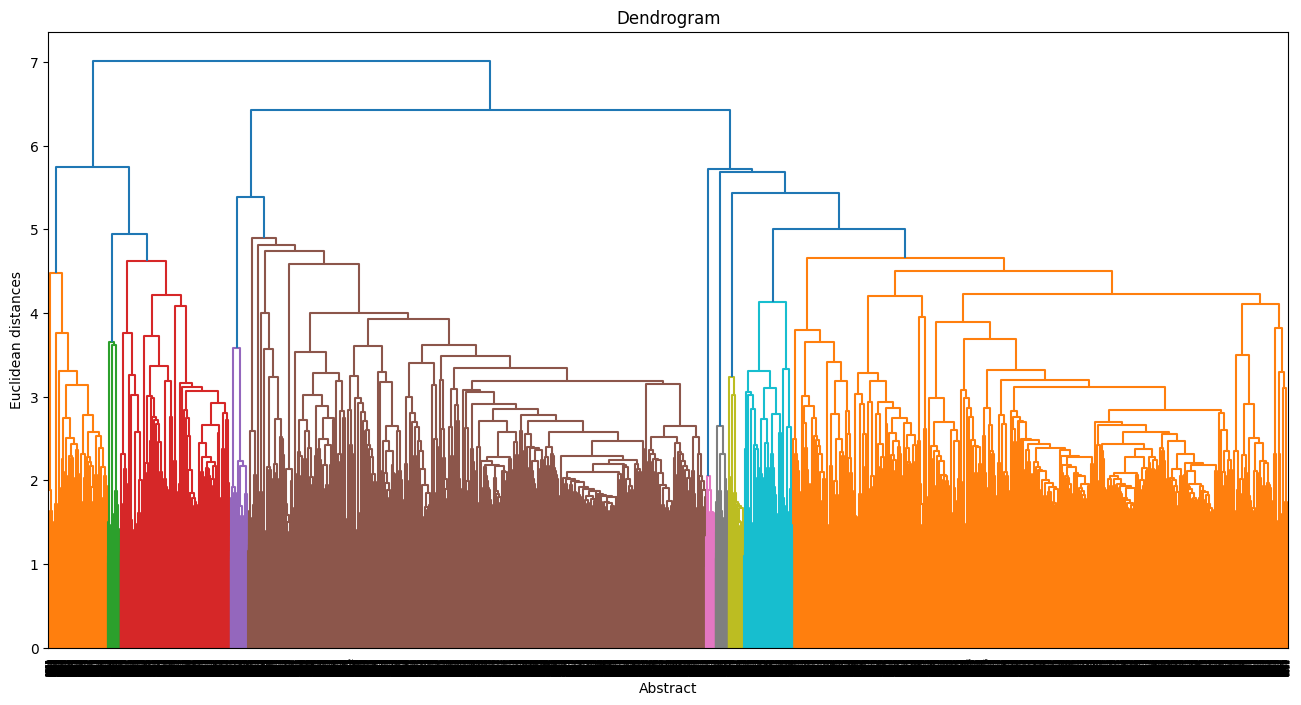

In [28]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(linkage_matrix)

plt.title('Dendrogram')
plt.xlabel('Abstract')
plt.ylabel('Euclidean distances')
plt.show()

<a id = "12"></a><br>
># <font color="green"><u> C. Spectral clustering:</u></font>

In [29]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X.toarray()) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [30]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

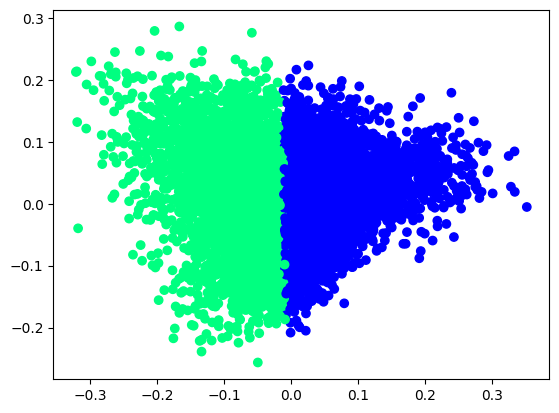

In [31]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

<a id = "13"></a><br>
># <font color="green"><u> D. Self-organizing maps (SOM):</u></font>

In [32]:
X_principal = X_principal.to_numpy()

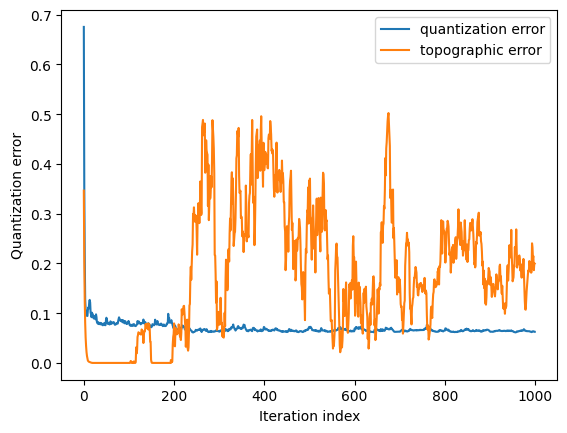

In [33]:
# I use linear som topography
som_shape = (1, 5)

som = MiniSom(som_shape[0], som_shape[1], X_principal.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X_principal))
    som.update(X_principal[rand_i], som.winner(X_principal[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X_principal))
    t_error.append(som.topographic_error(X_principal))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

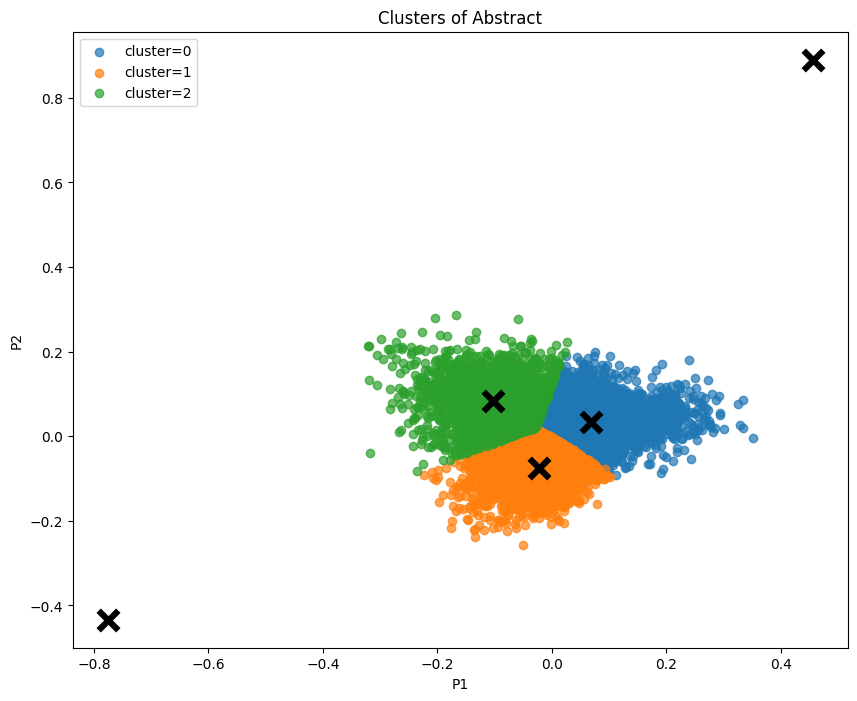

In [34]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X_principal]).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(X_principal[cluster_index == c, 0],
                X_principal[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# Plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.title("Clusters of Abstract")
plt.xlabel("P1")
plt.ylabel("P2")
plt.legend();